# Breast Cancer Classifier

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Load the dataset

In [5]:
raw_df = pd.read_excel('./Data file Genotypes_cases with gene names.xlsx')
raw_df.head()

,Unnamed: 0,FGFR2,PHB,GATA3,AKT1,NQO2,BRCA2,LSP1,FGFR1,CDH1,...,KRAS,FOXA1,CCND1,ABCC12,CDKN1B.2,BRCA1,LSP1.1,GATA3.2,NBN.2,diagnose
0,0,GT,CC,AA,CA,CT,AA,GC,TT,TT,...,CA,TC,AA,AA,AA,GA,GA,AA,AA,0
1,1,CT,CC,GA,CC,CT,AA,GC,TT,TT,...,CC,TT,CA,AA,CA,AA,GA,AA,AA,1
2,2,TT,CC,GA,CC,TT,AG,CC,TT,TT,...,CA,CC,CC,GG,AA,AA,GG,AA,AA,0
3,3,CT,TC,AA,CC,CC,AG,CC,CT,TC,...,CA,CC,CA,GA,CA,GA,GG,AA,GA,1
4,4,TT,TC,GA,CA,TT,AG,GC,CT,TT,...,CC,CC,CC,AA,AA,GG,GG,AA,GA,0


In [9]:
raw_df.drop(raw_df.columns[0],axis=1,inplace=True)

## Data Analytics

In [14]:
raw_df.shape

(20896, 58)

In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20896 entries, 0 to 20895
Data columns (total 58 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FGFR2     20896 non-null  object
 1   PHB       20896 non-null  object
 2   GATA3     20896 non-null  object
 3   AKT1      20896 non-null  object
 4   NQO2      20896 non-null  object
 5   BRCA2     20896 non-null  object
 6   LSP1      20896 non-null  object
 7   FGFR1     20896 non-null  object
 8   CDH1      20896 non-null  object
 9   NBN       20896 non-null  object
 10  BRCA2.1   20896 non-null  object
 11  BRCA2.2   20896 non-null  object
 12  NQO2.1    20896 non-null  object
 13  NQO2.2    20896 non-null  object
 14  RB1CC1    20896 non-null  object
 15  CASP8     20896 non-null  object
 16  BRCA2.3   20896 non-null  object
 17  MLH1      20896 non-null  object
 18  ATM       20896 non-null  object
 19  NBN.1     20896 non-null  object
 20  EP300     20896 non-null  object
 21  CDKN1B    20

### Checking Null Values

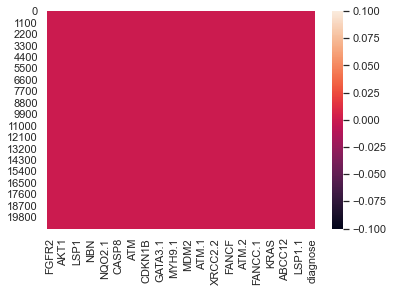

In [18]:
sns.heatmap(raw_df.isnull())

## Data Visualization

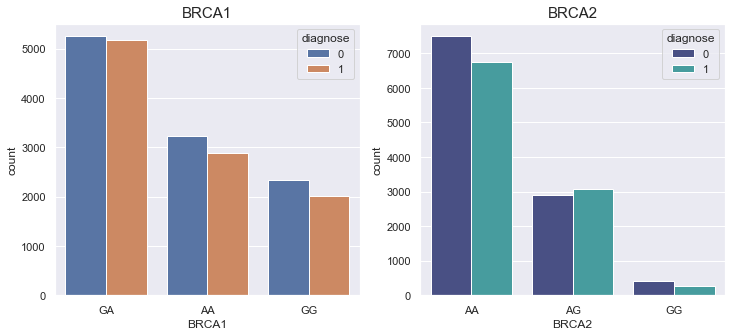

In [22]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.countplot(raw_df['BRCA1'],hue=raw_df['diagnose'])
plt.title('BRCA1',fontsize=15)


plt.subplot(1, 2, 2)
sns.countplot(raw_df['BRCA2'],hue=raw_df['diagnose'],palette='mako')
plt.title('BRCA2',fontsize=15)

plt.show()

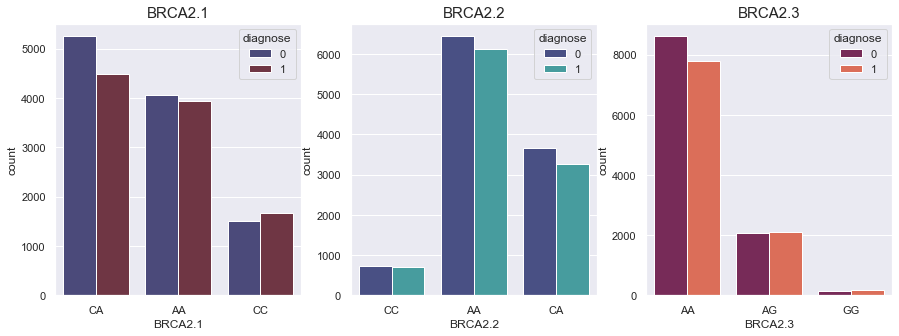

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.countplot(raw_df['BRCA2.1'],hue=raw_df['diagnose'],palette='icefire')
plt.title('BRCA2.1',fontsize=15)


plt.subplot(1, 3, 2)
sns.countplot(raw_df['BRCA2.2'],hue=raw_df['diagnose'],palette='mako')
plt.title('BRCA2.2',fontsize=15)


plt.subplot(1, 3, 3)
sns.countplot(raw_df['BRCA2.3'],hue=raw_df['diagnose'],palette='rocket')
plt.title('BRCA2.3',fontsize=15)


plt.show()

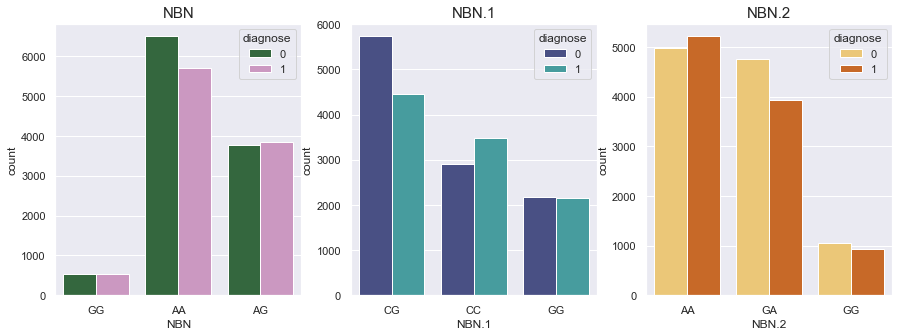

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.countplot(raw_df['NBN'],hue=raw_df['diagnose'],palette='cubehelix')
plt.title('NBN',fontsize=15)


plt.subplot(1, 3, 2)
sns.countplot(raw_df['NBN.1'],hue=raw_df['diagnose'],palette='mako')
plt.title('NBN.1',fontsize=15)


plt.subplot(1, 3, 3)
sns.countplot(raw_df['NBN.2'],hue=raw_df['diagnose'],palette='YlOrBr')
plt.title('NBN.2',fontsize=15)


plt.show()

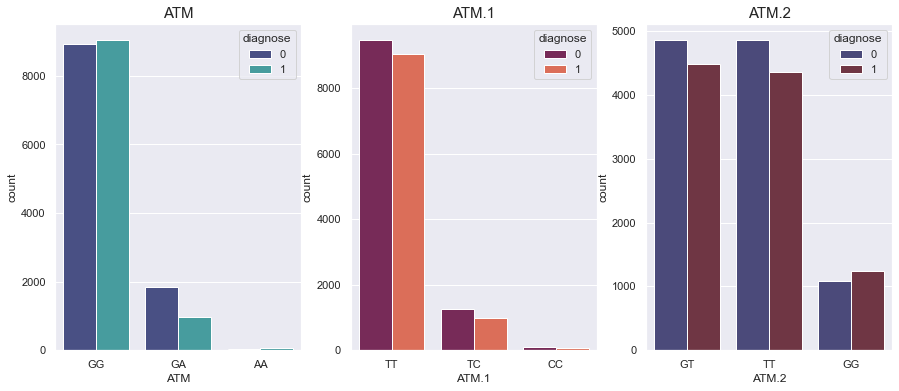

In [25]:
plt.figure(figsize=(15,6))

plt.subplot(1, 3, 1)
sns.countplot(raw_df['ATM'],hue=raw_df['diagnose'],palette='mako')
plt.title('ATM',fontsize=15)


plt.subplot(1, 3, 2)
sns.countplot(raw_df['ATM.1'],hue=raw_df['diagnose'],palette='rocket')
plt.title('ATM.1',fontsize=15)


plt.subplot(1, 3, 3)
sns.countplot(raw_df['ATM.2'],hue=raw_df['diagnose'],palette='icefire')
plt.title('ATM.2',fontsize=15)


plt.show()

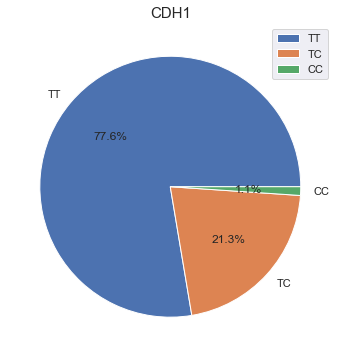

In [32]:
plt.figure(figsize=(8,6))
plt.pie(raw_df['CDH1'].value_counts(),autopct='%1.1f%%',labels=raw_df['CDH1'].unique())
plt.title('CDH1',fontsize=15)
plt.legend()
plt.show()

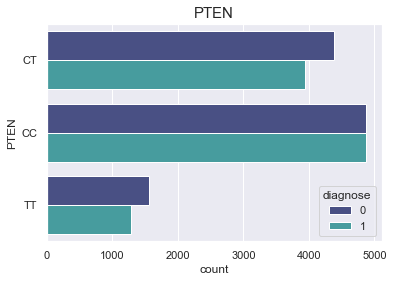

In [34]:
sns.countplot(y=raw_df['PTEN'],hue=raw_df['diagnose'],palette='mako')
plt.title('PTEN',fontsize=15)
plt.show()

## Feature Engineering

In [35]:
df = raw_df[['CDH1','PTEN','TP53','ATM','ATM.1','ATM.2','NBN','NBN.1','NBN.2','AKT1','BRCA1','BRCA2','BRCA2.1', 'BRCA2.2','BRCA2.3','diagnose']]

In [36]:
df.shape

(20896, 16)

## Converting Categorical Values into Numerical

In [40]:
pd.get_dummies(df).columns

Index(['diagnose', 'CDH1_CC', 'CDH1_TC', 'CDH1_TT', 'PTEN_CC', 'PTEN_CT',
       'PTEN_TT', 'TP53_CC', 'TP53_TC', 'TP53_TT', 'ATM_AA', 'ATM_GA',
       'ATM_GG', 'ATM.1_CC', 'ATM.1_TC', 'ATM.1_TT', 'ATM.2_GG', 'ATM.2_GT',
       'ATM.2_TT', 'NBN_AA', 'NBN_AG', 'NBN_GG', 'NBN.1_CC', 'NBN.1_CG',
       'NBN.1_GG', 'NBN.2_AA', 'NBN.2_GA', 'NBN.2_GG', 'AKT1_AA', 'AKT1_CA',
       'AKT1_CC', 'BRCA1_AA', 'BRCA1_GA', 'BRCA1_GG', 'BRCA2_AA', 'BRCA2_AG',
       'BRCA2_GG', 'BRCA2.1_AA', 'BRCA2.1_CA', 'BRCA2.1_CC', 'BRCA2.2_AA',
       'BRCA2.2_CA', 'BRCA2.2_CC', 'BRCA2.3_AA', 'BRCA2.3_AG', 'BRCA2.3_GG'],
      dtype='object')

In [41]:
df = pd.get_dummies(df,drop_first=True)

In [42]:
df.head(2)

,diagnose,CDH1_TC,CDH1_TT,PTEN_CT,PTEN_TT,TP53_TC,TP53_TT,ATM_GA,ATM_GG,ATM.1_TC,...,BRCA1_GA,BRCA1_GG,BRCA2_AG,BRCA2_GG,BRCA2.1_CA,BRCA2.1_CC,BRCA2.2_CA,BRCA2.2_CC,BRCA2.3_AG,BRCA2.3_GG
0,0,0,1,1,0,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


## Separating Dependent & Independent Variables 

In [43]:
X = df.drop('diagnose',axis=1).values
y = df['diagnose'].values

## Train Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Standardizing Values

In [45]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Building ANN Model

In [46]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(rate=0.5))

# BINARY CLASSIFICATION
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

## Adding Early Stopping

In [47]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=5)

## Training Model

In [48]:
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test,y_test),
          epochs=200,
          callbacks=[early_stop])

Epoch 1/200
458/458 [==============================] - 3s 4ms/step - loss: 0.7084 - accuracy: 0.5085 - val_loss: 0.6880 - val_accuracy: 0.5534
Epoch 2/200
458/458 [==============================] - 1s 3ms/step - loss: 0.6886 - accuracy: 0.5271 - val_loss: 0.6778 - val_accuracy: 0.6130
Epoch 3/200
458/458 [==============================] - 1s 3ms/step - loss: 0.6815 - accuracy: 0.5403 - val_loss: 0.6614 - val_accuracy: 0.6406
Epoch 4/200
458/458 [==============================] - 1s 3ms/step - loss: 0.6643 - accuracy: 0.5863 - val_loss: 0.6389 - val_accuracy: 0.6688
Epoch 5/200
458/458 [==============================] - 1s 3ms/step - loss: 0.6514 - accuracy: 0.6060 - val_loss: 0.6115 - val_accuracy: 0.7007
Epoch 6/200
458/458 [==============================] - 1s 3ms/step - loss: 0.6311 - accuracy: 0.6352 - val_loss: 0.5901 - val_accuracy: 0.7296
Epoch 7/200
458/458 [==============================] - 1s 3ms/step - loss: 0.6134 - accuracy: 0.6514 - val_loss: 0.5493 - val_accuracy: 0.7459

Epoch 58/200
458/458 [==============================] - 1s 3ms/step - loss: 0.3551 - accuracy: 0.8193 - val_loss: 0.1665 - val_accuracy: 0.9529
Epoch 59/200
458/458 [==============================] - 1s 3ms/step - loss: 0.3450 - accuracy: 0.8191 - val_loss: 0.1630 - val_accuracy: 0.9507
Epoch 60/200
458/458 [==============================] - 1s 3ms/step - loss: 0.3469 - accuracy: 0.8231 - val_loss: 0.1667 - val_accuracy: 0.9502
Epoch 61/200
458/458 [==============================] - 1s 3ms/step - loss: 0.3421 - accuracy: 0.8260 - val_loss: 0.1629 - val_accuracy: 0.9488
Epoch 62/200
458/458 [==============================] - 1s 3ms/step - loss: 0.3507 - accuracy: 0.8188 - val_loss: 0.1638 - val_accuracy: 0.9568
Epoch 63/200
458/458 [==============================] - 1s 3ms/step - loss: 0.3470 - accuracy: 0.8223 - val_loss: 0.1595 - val_accuracy: 0.9553
Epoch 64/200
458/458 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8273 - val_loss: 0.1525 - val_accuracy:

## Model Evaluation

In [49]:
eval_df = pd.DataFrame(model.history.history)

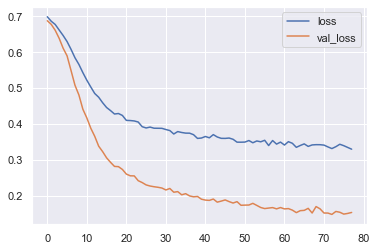

In [50]:
eval_df[['loss','val_loss']].plot()

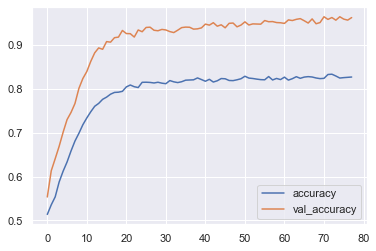

In [51]:
eval_df[['accuracy','val_accuracy']].plot()

In [52]:
loss, accuracy = model.evaluate(X_test, y_test)

196/196 [==============================] - 0s 1ms/step - loss: 0.1530 - accuracy: 0.9620


In [56]:
print('Model accuracy on test dataset:',round(accuracy*100,2),"%")

Model accuracy on test dataset: 96.2 %


## Training model on complete dataset

In [57]:
scaled_X = scaler.transform(X)

In [58]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(rate=0.5))

# BINARY CLASSIFICATION
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
model.fit(scaled_X,y,epochs=75)

Epoch 1/75
653/653 [==============================] - 2s 2ms/step - loss: 0.7090 - accuracy: 0.5032
Epoch 2/75
653/653 [==============================] - 1s 2ms/step - loss: 0.6807 - accuracy: 0.5474
Epoch 3/75
653/653 [==============================] - 1s 2ms/step - loss: 0.6544 - accuracy: 0.5975
Epoch 4/75
653/653 [==============================] - 1s 2ms/step - loss: 0.6252 - accuracy: 0.6416
Epoch 5/75
653/653 [==============================] - 1s 2ms/step - loss: 0.5845 - accuracy: 0.6786
Epoch 6/75
653/653 [==============================] - 1s 2ms/step - loss: 0.5482 - accuracy: 0.7219
Epoch 7/75
653/653 [==============================] - 1s 2ms/step - loss: 0.5214 - accuracy: 0.7377
Epoch 8/75
653/653 [==============================] - 1s 2ms/step - loss: 0.4946 - accuracy: 0.7536
Epoch 9/75
653/653 [==============================] - 1s 2ms/step - loss: 0.4757 - accuracy: 0.7636
Epoch 10/75
653/653 [==============================] - 1s 2ms/step - loss: 0.4555 - accuracy: 0.7776

In [67]:
print('Model accuracy on complete dataset:',round((model.history.history['accuracy'][-1])*100,2),"%")

Model accuracy on complete dataset: 83.38 %


## Saving Model

In [68]:
model.save('breast_cancer_model.h5')

In [69]:
import joblib
joblib.dump(scaler,'breast_cancer_scaler.pkl')

['breast_cancer_scaler.pkl']